In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = 'used_car_sales.csv'  # Update this with the actual path to your file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(df.head())
print(df.shape)


       ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6 

In [2]:
print(df.shape)


(122144, 13)


In [3]:
print(df.describe())


                  ID      pricesold       yearsold       Mileage  \
count  122144.000000  122144.000000  122144.000000  1.221440e+05   
mean    85094.212397   10808.560715    2019.375467  1.404291e+06   
std     47786.970812   13987.295760       0.503671  3.335593e+07   
min         1.000000       0.000000    2018.000000  0.000000e+00   
25%     44547.250000    2950.000000    2019.000000  4.479225e+04   
50%     85555.500000    6500.000000    2019.000000  9.000000e+04   
75%    127078.500000   13800.000000    2020.000000  1.402000e+05   
max    165801.000000  404990.000000    2020.000000  1.235669e+09   

               Year  NumCylinders  
count  1.221440e+05  1.221440e+05  
mean   3.959362e+03  1.758655e+04  
std    1.984514e+05  6.144603e+06  
min    0.000000e+00  0.000000e+00  
25%    1.977000e+03  4.000000e+00  
50%    2.000000e+03  6.000000e+00  
75%    2.008000e+03  8.000000e+00  
max    2.014000e+07  2.147484e+09  


In [4]:
print(df.isnull().sum())


ID                  0
pricesold           0
yearsold            0
zipcode           909
Mileage             0
Make                0
Model             573
Year                0
Trim            48936
Engine          27204
BodyType        20786
NumCylinders        0
DriveType       24857
dtype: int64


In [6]:
print(df.columns)


Index(['ID', 'pricesold', 'yearsold', 'zipcode', 'Mileage', 'Make', 'Model',
       'Year', 'Trim', 'Engine', 'BodyType', 'NumCylinders', 'DriveType'],
      dtype='object')


In [9]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# For simplicity, we'll use label encoding for the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Now, handle missing values. For this example, we'll fill them with the mean of the column.
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Now, you can scale the features excluding 'pricesold'
scaled_features = scaler.fit_transform(df.drop('pricesold', axis=1))


In [10]:
from sklearn.model_selection import train_test_split

X = scaled_features
y = df['pricesold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)  # 你可以通过调整"n_neighbors"参数来选择不同的K值
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 187978040.44307995


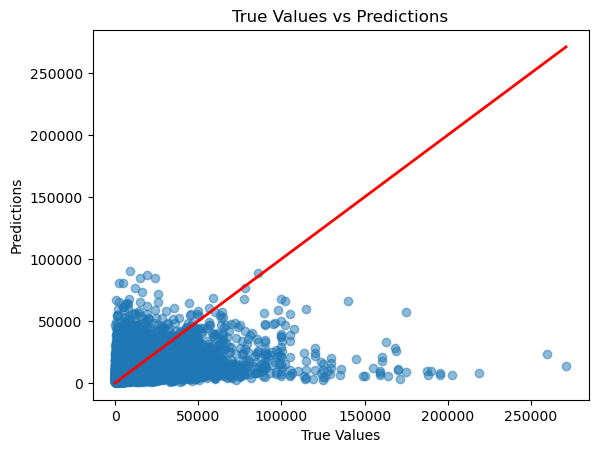

In [13]:
import matplotlib.pyplot as plt

# 使用KNN模型进行预测
y_pred = knn.predict(X_test)

# 绘制真实值与预测值的散点图
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# 绘制代表完美预测的对角线
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.show()


In [14]:
from sklearn.metrics import r2_score

# 使用模型进行预测
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# 计算训练集和测试集的R²分数
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R² Score: {r2_train:.2f}")
print(f"Test R² Score: {r2_test:.2f}")


Training R² Score: 0.38
Test R² Score: 0.04


In [15]:
from sklearn.metrics import mean_squared_error

# 寻找最佳的 k 值
errors = []
k_range = range(1, 30)  # 例如，我们可以尝试从1到29的k值

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

# 找到误差最小的 k 值
optimal_k = k_range[errors.index(min(errors))]

print(f"The optimal number of neighbors (k) is {optimal_k}")


The optimal number of neighbors (k) is 27


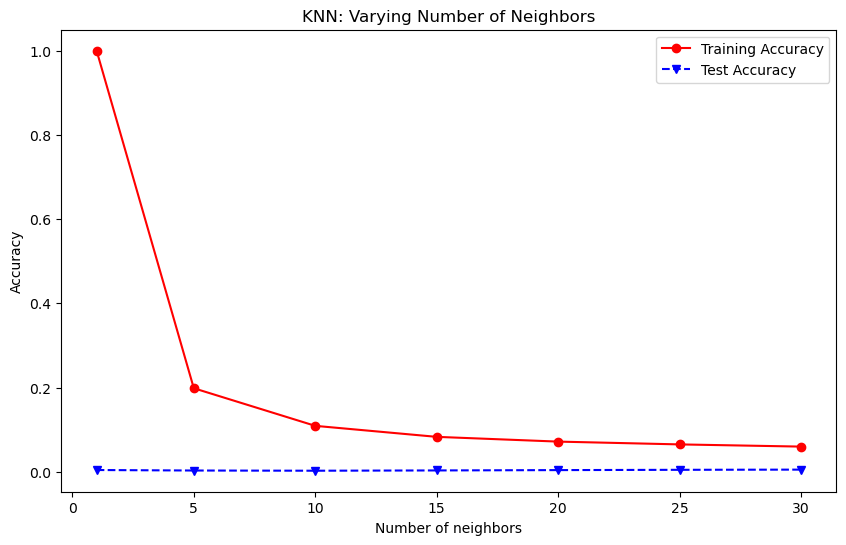

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 为了在 Jupyter Notebook 中显示图形
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []
X = df.drop('pricesold', axis=1)
Y = df['pricesold']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# 训练不同的 k 值
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

# 绘制准确率图
plt.figure(figsize=(10,6))
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying Number of Neighbors')
plt.show()


In [19]:
X = df.drop('pricesold', axis=1)
Y = df['pricesold']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 创建决策树分类器
clf = DecisionTreeClassifier(random_state=0)

# 使用训练数据训练模型
clf.fit(X_train, Y_train)

# 对训练数据和测试数据进行预测
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

# 计算训练和测试的准确率
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


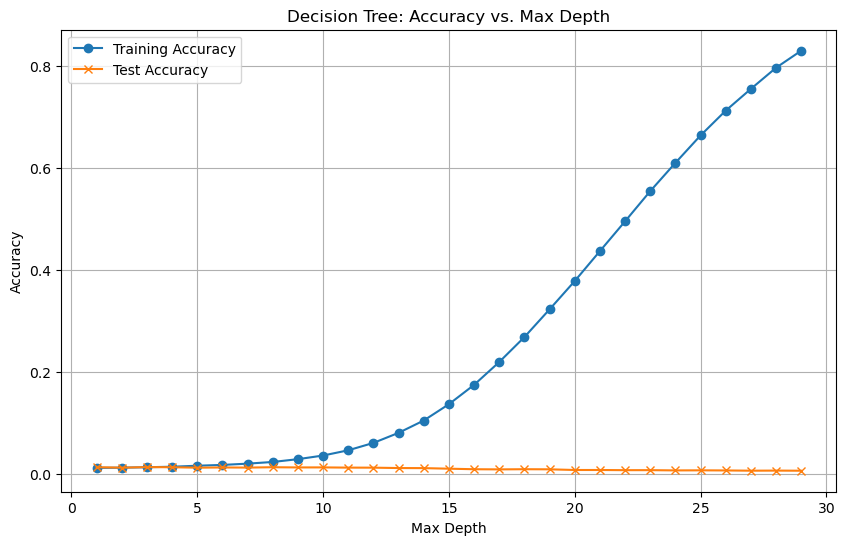

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 最大深度的范围
max_depths = list(range(1, 30))
train_accuracies = []
test_accuracies = []

# 对每一个深度进行训练和测试
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, Y_train)
    
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    
    train_accuracies.append(accuracy_score(Y_train, Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test, Y_pred_test))

# 画出训练和测试准确率随深度变化的图
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(max_depths, test_accuracies, label="Test Accuracy", marker='x')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Accuracy vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()
